In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_train
import utils_annotate
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
file_list = os.listdir('individual_ner/')
file_list

['10.1016j.commatsci.2023.112376.json',
 '10.1016j.flatc.2022.100446.json',
 '10.1016j.flatc.2022.100347.json',
 '10.1016j.commatsci.2021.110960.json',
 '10.1016j.apmt.2020.100685.json',
 '10.1016j.carbon.2021.10.059.json',
 '10.1016j.cpc.2020.107583.json',
 '10.1016j.commatsci.2019.109333.json',
 '10.1016j.commatsci.2023.112655.json',
 '10.1016j.commatsci.2023.112723.json',
 '10.1016j.jnucmat.2023.154794.json',
 '10.1016j.commatsci.2023.112388.json',
 '10.1016j.cartre.2023.100260.json',
 '10.1016j.jallcom.2023.169964.json',
 '10.1016j.cpc.2023.108920.json',
 '10.1016j.commatsci.2023.112526.json',
 '10.1016j.ssi.2023.116358.json',
 '10.1016j.apmt.2023.101951.json',
 '10.1016j.ssi.2023.116298.json',
 '10.1016j.ijheatmasstransfer.2023.124011.json',
 '10.1016j.commatsci.2022.111970.json',
 '10.1016j.ijheatmasstransfer.2021.121589.json',
 '10.1016j.actamat.2021.116980.json',
 '10.1016j.commatsci.2023.112656.json',
 '10.1016j.commatsci.2022.111330.json',
 '10.1016j.tsf.2021.138927.json',
 '

In [3]:
record = '10.1016j.commatsci.2023.112723.json'#file_list[16]
print(record)
file = f'individual_ner/{record}'
data = utils_annotate.load_json(file)
# rec = utils_annotate.check(file)

10.1016j.commatsci.2023.112723.json


In [ ]:
new_rec, new_rec4check = utils_annotate.revise(file,
 [57, 59, 62, 127, 129], 'PROPERTY', overwrite=True)

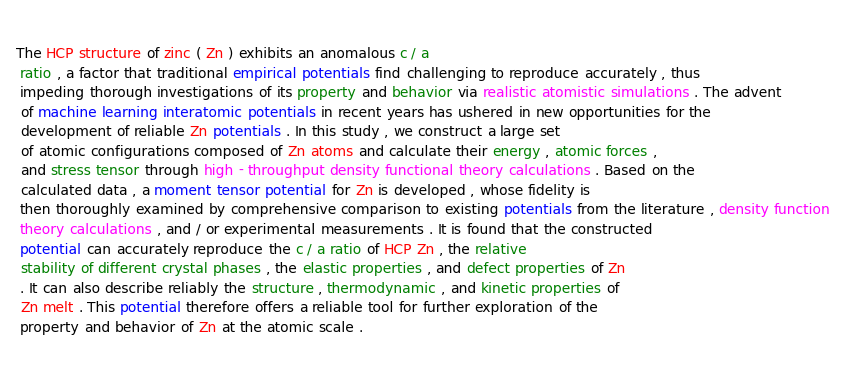

In [4]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in data['words']]
markers = [{"color": colors[i]} for i in data['ner']]
j = 0
for i in range(len(data['words'])):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
# HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
#               highlight_textprops=[{"color": c} for c in colors], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [ ]:
rec

In [ ]:
word_list, categories = utils_annotate.reannotate(file, ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION'])